In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from matplotlib import pyplot as plt
import itertools
from boruta import BorutaPy

from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import random

from imblearn.over_sampling import SMOTE

%load_ext autoreload
%autoreload 2

In [4]:
#reading cleaned data

cleaned_data = pd.read_csv('cleaned_ALF.csv')
cleaned_data.head()

,Age,Gender,Region,Weight,Height,Obesity,Waist,Maximum Blood Pressure,Minimum Blood Pressure,Good Cholesterol,...,PoorVision,Alcohol Consumption,HyperTension,Family HyperTension,Diabetes,Family Diabetes,Hepatitis,Family Hepatitis,Chronic Fatigue,ALF
0,0.831115,M,east,-1.375619,-0.477502,0,-0.891051,0.609135,-0.078224,-0.097270,...,0,1,0,0,0,1,1,0,0,0
1,-0.708962,M,south,-1.050205,-0.467287,0,-1.468656,-1.882007,-1.539388,-1.631512,...,0,0,0,0,0,0,0,0,0,0
2,0.884221,M,east,0.389124,-0.436667,1,1.102177,-0.440167,-1.172720,-0.396743,...,0,1,0,0,1,0,0,0,0,0
3,0.246948,M,east,-0.422791,-0.641547,0,-1.357408,-0.767470,-1.172720,1.350621,...,0,1,0,0,0,0,0,0,0,0
4,0.724902,M,north,-0.197701,-0.775672,0,-0.456144,0.473608,0.085765,1.024309,...,0,0,1,0,0,0,0,0,0,0


In [5]:
X = cleaned_data.iloc[:,0:-1]
y = cleaned_data.iloc[:,-1]

In [6]:
X_dummies = pd.get_dummies(X, prefix_sep='_')
X_dummies.head()

,Age,Weight,Height,Obesity,Waist,Maximum Blood Pressure,Minimum Blood Pressure,Good Cholesterol,Bad Cholesterol,Dyslipidemia,...,Gender_F,Gender_M,Region_east,Region_north,Region_south,Region_west,Source of Care_Governament Hospital,Source of Care_Never Counsulted,Source of Care_Private Hospital,Source of Care_clinic
0,0.831115,-1.375619,-0.477502,0,-0.891051,0.609135,-0.078224,-0.097270,1.993208,0,...,0,1,1,0,0,0,1,0,0,0
1,-0.708962,-1.050205,-0.467287,0,-1.468656,-1.882007,-1.539388,-1.631512,-0.334656,0,...,0,1,0,0,1,0,0,1,0,0
2,0.884221,0.389124,-0.436667,1,1.102177,-0.440167,-1.172720,-0.396743,1.321183,1,...,0,1,1,0,0,0,0,1,0,0
3,0.246948,-0.422791,-0.641547,0,-1.357408,-0.767470,-1.172720,1.350621,0.177565,0,...,0,1,1,0,0,0,0,0,1,0
4,0.724902,-0.197701,-0.775672,0,-0.456144,0.473608,0.085765,1.024309,0.130951,0,...,0,1,0,1,0,0,0,0,0,1


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_dummies, y, test_size=0.2, random_state=0)

In [8]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
print("Before OverSampling, counts of label '1/True': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0/False': {}".format(sum(y_train==0)))

Before OverSampling, counts of label '1/True': 367
Before OverSampling, counts of label '0/False': 4431


### SMOTE Oversampling

In [10]:
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.values)

In [11]:
print("After OverSampling, counts of label '1/True': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0/False': {}".format(sum(y_train_res==0)))

After OverSampling, counts of label '1/True': 4431
After OverSampling, counts of label '0/False': 4431


### Logistic Regression

#### Test Data

In [12]:
log_regressor = LogisticRegression(random_state=3)
log_regressor.fit(X_train_res, y_train_res)
y_pred = pd.DataFrame(log_regressor.predict(X_test))

In [13]:
conf_matrix_log_test = confusion_matrix(y_test, y_pred)
print(conf_matrix_log_test)
print(classification_report(y_test, y_pred))

[[995 108]
 [ 53  44]]
              precision    recall  f1-score   support

           0       0.95      0.90      0.93      1103
           1       0.29      0.45      0.35        97

    accuracy                           0.87      1200
   macro avg       0.62      0.68      0.64      1200
weighted avg       0.90      0.87      0.88      1200



#### Training Data

In [14]:
log_regressor.fit(X_train_res, y_train_res)
y_pred_train = pd.DataFrame(log_regressor.predict(X_train_res))

In [15]:
conf_matrix_log_train = confusion_matrix(y_train_res, y_pred_train)
print(conf_matrix_log_train)
print(classification_report(y_train_res, y_pred_train))

[[3939  492]
 [ 381 4050]]
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      4431
           1       0.89      0.91      0.90      4431

    accuracy                           0.90      8862
   macro avg       0.90      0.90      0.90      8862
weighted avg       0.90      0.90      0.90      8862



In [16]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
print(classification_report(y_test, y_pred))

[[995 108]
 [ 53  44]]
              precision    recall  f1-score   support

           0       0.95      0.90      0.93      1103
           1       0.29      0.45      0.35        97

    accuracy                           0.87      1200
   macro avg       0.62      0.68      0.64      1200
weighted avg       0.90      0.87      0.88      1200



#### ROC Curve

In [17]:
def plot_roc(test_y, y_pred, save_path):
    y_pred = pd.DataFrame(y_pred)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(test_y.shape[0]):
        fpr[i], tpr[i], _ = roc_curve(test_y[i:], y_pred[i:])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(test_y.values.ravel(), y_pred.values.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    plt.figure()
    lw = 2
    plt.plot(fpr[2], tpr[2], color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.autoscale(enable=True, axis='both')
    plt.savefig(save_path)
    plt.show()
    return "ROC curve plotted!"

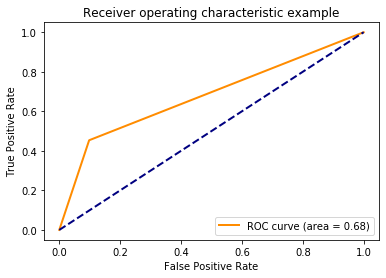

'ROC curve plotted!'

In [18]:
plot_roc(y_test, y_pred, 'roc_logistic_SMOTE.jpg')

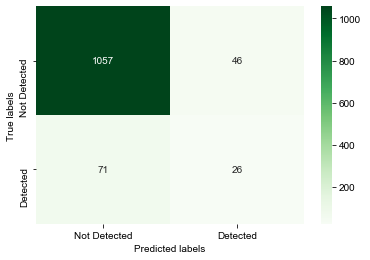

In [24]:
plot_confusion_matrix(y_pred)

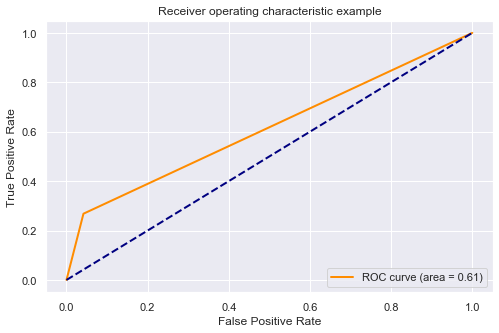

'ROC curve plotted!'

In [21]:
plot_roc(y_test, y_pred, 'roc_rf_SMOTE.jpg')

### Random Forest

#### Test Data

In [21]:
rf_classifier= RandomForestClassifier(random_state=3)
rf_classifier.fit(X_train_res, y_train_res)
y_pred = pd.DataFrame(rf_classifier.predict(X_test))

In [56]:
conf_matrix_rf = confusion_matrix(y_test, y_pred)
print(conf_matrix_rf)
print(classification_report(y_test, y_pred))

[[1057   46]
 [  71   26]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1103
           1       0.36      0.27      0.31        97

    accuracy                           0.90      1200
   macro avg       0.65      0.61      0.63      1200
weighted avg       0.89      0.90      0.90      1200



#### Train Data

In [57]:
y_pred_train = pd.DataFrame(rf_classifier.predict(X_train_res))

In [60]:
print( np.mean(cross_val_score(rf_classifier, X_train, y_train, cv=10)))

0.92580375782881


In [58]:
conf_matrix_train_rf = confusion_matrix(y_train_res, y_pred_train)
print(conf_matrix_train_rf)
print(classification_report(y_train_res, y_pred_train))

[[4431    0]
 [   0 4431]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4431
           1       1.00      1.00      1.00      4431

    accuracy                           1.00      8862
   macro avg       1.00      1.00      1.00      8862
weighted avg       1.00      1.00      1.00      8862



### Naive Bayes

#### Test Data

In [42]:
nb = GaussianNB()
nb.fit(X_train_res, y_train_res)
y_pred_nb = pd.DataFrame(nb.predict(X_test))

In [43]:
conf_matrix_nb_train = confusion_matrix(y_test, y_pred_nb)
print(conf_matrix_nb_train)
print("Naive Bayes - Test Set \n\n",classification_report(y_test, y_pred_nb))

[[877 226]
 [ 29  68]]
Naive Bayes - Test Set 

               precision    recall  f1-score   support

           0       0.97      0.80      0.87      1103
           1       0.23      0.70      0.35        97

    accuracy                           0.79      1200
   macro avg       0.60      0.75      0.61      1200
weighted avg       0.91      0.79      0.83      1200



#### Train

In [23]:
y_pred_train_nb = pd.DataFrame(nb.predict(X_train_res))

NameError: name 'nb' is not defined

In [45]:
conf_matrix_nb = confusion_matrix(y_train_res, y_pred_train_nb)
print(conf_matrix_nb)
print("Naive Bayes - Train Set \n\n",classification_report(y_train_res, y_pred_train_nb))

[[3369 1062]
 [ 354 4077]]
Naive Bayes - Train Set 

               precision    recall  f1-score   support

           0       0.90      0.76      0.83      4431
           1       0.79      0.92      0.85      4431

    accuracy                           0.84      8862
   macro avg       0.85      0.84      0.84      8862
weighted avg       0.85      0.84      0.84      8862



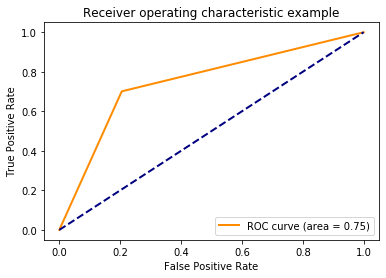

'ROC curve plotted!'

In [61]:
plot_roc(y_test, y_pred_nb, 'roc_nb.jpg')

In [1]:
def plot_confusion_matrix(y_pred):
    ax= plt.subplot()
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax = ax, fmt='g', cmap='Greens' ); #annot=True to annotate cells
    sns.set(rc={'figure.figsize':(15,10)})
    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.xaxis.set_ticklabels(['Not Detected', 'Detected']); ax.yaxis.set_ticklabels(['Not Detected', 'Detected']);

In [ ]:
random.seed(230)
sample_ALF = cleaned_data[cleaned_data['ALF']==0].sample(500)
sample_ALF

In [ ]:
sample_clean_data = pd.concat([sample_ALF, cleaned_data[cleaned_data['ALF']==1]])
sample_clean_data.shape

In [ ]:
X = sample_clean_data.iloc[:,0:-1]
y = sample_clean_data.iloc[:,-1]

In [ ]:
X_dummies_sample = pd.get_dummies(X, prefix_sep='_')
X_dummies_sample.head()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_dummies_sample, y, test_size=0.2, random_state=0)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.values)

In [ ]:
print("After OverSampling, counts of label '1/True': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0/False': {}".format(sum(y_train_res==0)))

In [27]:
# define random forest classifier, with utilising all cores and
# sampling in proportion to y labels
y_train = y_train.ravel()
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)

# define Boruta feature selection method
feat_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=1)

# find all relevant features - 5 features should be selected
feat_selector.fit(X_train_res, y_train_res)

# check selected features - first 5 features are selected
feat_selector.support_

# check ranking of features
feat_selector.ranking_

# call transform() on X to filter it down to selected features
X_filtered = feat_selector.transform(X)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	34
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	34
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	34
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	34
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	34
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	34
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	34
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	14
Tentative: 	4
Rejected: 	16
Iteration: 	9 / 100
Confirmed: 	14
Tentative: 	4
Rejected: 	16
Iteration: 	10 / 100
Confirmed: 	14
Tentative: 	4
Rejected: 	16
Iteration: 	11 / 100
Confirmed: 	14
Tentative: 	4
Rejected: 	16
Iteration: 	12 / 100
Confirmed: 	14
Tentative: 	4
Rejected: 	16
Iteration: 	13 / 100
Confirmed: 	14
Tentative: 	4
Rejected: 	16
Iteration: 	14 / 100
Confirmed: 	14
Tentative: 	4
Rejected: 	16
Iteration: 	15 / 100
Confirmed: 	14
Tentative: 	4
Rejected: 	16
Iteration: 	16 / 100
Confirmed: 	14
Tentative: 	4
Reject

TypeError: '(slice(None, None, None), array([ True,  True, False, False,  True,  True,  True,  True, False,
       False,  True,  True, False, False, False, False, False,  True,
       False,  True, False,  True, False,  True, False, False,  True,
       False,  True, False, False,  True, False, False]))' is an invalid key

Iteration: 	1 / 10
Confirmed: 	0
Tentative: 	34
Rejected: 	0
Iteration: 	2 / 10
Confirmed: 	0
Tentative: 	34
Rejected: 	0
Iteration: 	3 / 10
Confirmed: 	0
Tentative: 	34
Rejected: 	0
Iteration: 	4 / 10
Confirmed: 	0
Tentative: 	34
Rejected: 	0
Iteration: 	5 / 10
Confirmed: 	0
Tentative: 	34
Rejected: 	0
Iteration: 	6 / 10
Confirmed: 	0
Tentative: 	34
Rejected: 	0
Iteration: 	7 / 10
Confirmed: 	0
Tentative: 	34
Rejected: 	0
Iteration: 	8 / 10
Confirmed: 	28
Tentative: 	6
Rejected: 	0
Iteration: 	9 / 10
Confirmed: 	28
Tentative: 	4
Rejected: 	2


BorutaPy finished running.

Iteration: 	10 / 10
Confirmed: 	28
Tentative: 	3
Rejected: 	2


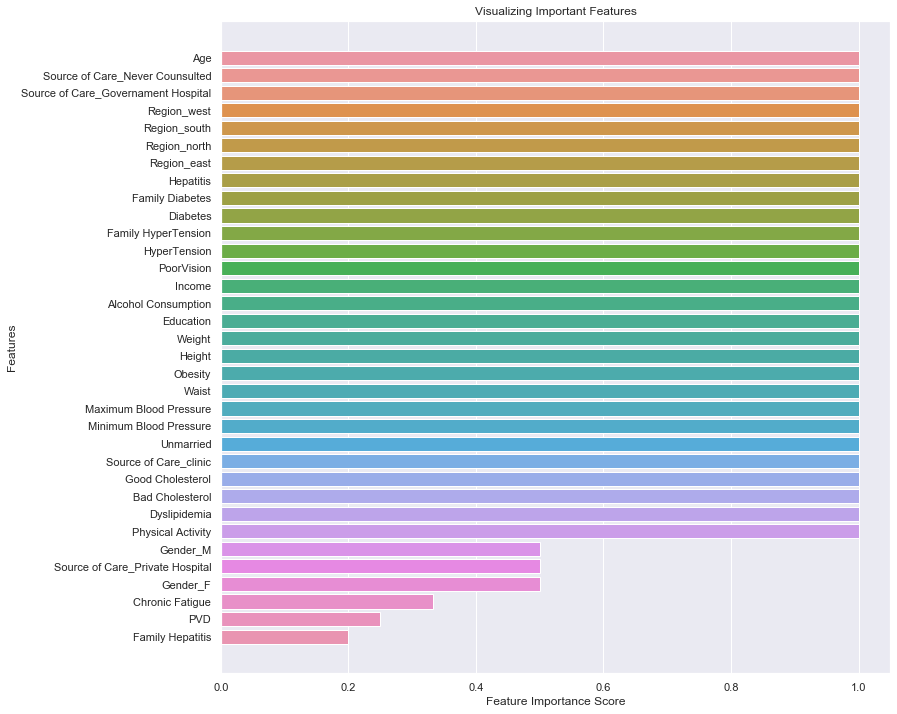

In [32]:
feat_selector = BorutaPy(rf, n_estimators='auto', verbose=3, max_iter = 10) 
feat_selector.fit(X_train_res.values, y_train_res) 
feature_imp = pd.Series(feat_selector.ranking_,index=X_train_res.columns).sort_values(ascending=True) 
plt.figure(figsize=(12,12)) 
sns.barplot(x=1/feature_imp, y=feature_imp.index) # Add labels to your graph 
plt.xlabel('Feature Importance Score') 
plt.ylabel('Features') 
plt.title("Visualizing Important Features") 
plt.autoscale(enable=True, axis='both') 
plt.show()

In [ ]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(15,12))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [ ]:
plot_confusion_matrix(conf_matrix,
                      normalize    = False,
                      target_names = ['No', 'Yes'],
                      title        = "Confusion Matrix")
